# RobustScaler for Unsupervised and Supervised Models

#### Using RobustScaler to scale the data before using unsupervised and supervised learning on the data to see if it provides a better model. 

<br>

#### Use 3+ supervised machine learning models covered in this class (remember the no free lunch theorem). Use SciKit Learn for this. You may use Tensorflow/Keras for neural networks models.

<br>

#### Use 3+ unsupervised machine learning models covered in this class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_X = pd.read_csv('test_X.csv')
display(test_X)
test_y = pd.read_csv('test_y.csv')
display(test_y)
train_X = pd.read_csv('train_X.csv')
display(train_X)
train_y = pd.read_csv('train_y.csv')
display(train_y)
val_X = pd.read_csv('val_X.csv')
display(val_X)
val_y = pd.read_csv('val_y.csv')
display(val_y)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,208.519,220.315,199.020,0.00609,0.000030,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390
1,179.711,225.930,144.878,0.00709,0.000040,0.00391,0.00419,0.01172,0.04313,0.442,...,0.03455,0.06892,0.07223,11.866,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
2,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.00726,0.01403,0.00065,33.047,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539
3,174.688,240.005,74.287,0.01360,0.000080,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
4,110.453,127.611,105.554,0.00494,0.000040,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
5,115.380,123.109,108.634,0.00332,0.000030,0.00160,0.00199,0.00480,0.01503,0.137,...,0.01133,0.02436,0.00401,26.005,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
6,244.990,272.210,239.170,0.00451,0.000020,0.00279,0.00237,0.00837,0.01897,0.181,...,0.01255,0.03253,0.01049,21.528,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
7,171.041,208.313,75.501,0.00455,0.000030,0.00250,0.00234,0.00750,0.01966,0.186,...,0.01872,0.02666,0.01095,25.908,0.418622,0.720916,-6.183590,0.226278,2.589702,0.147403
8,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.00951,0.01919,0.00119,30.775,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
9,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399


,status
0,1
1,1
2,0
3,0
4,1
5,0
6,0
7,1
8,0
9,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
1,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,...,0.05174,0.09669,0.11843,15.060,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
2,237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
3,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01144,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,0.154,...,0.01491,0.02460,0.01397,23.958,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,222.236,231.345,205.495,0.00266,0.00001,0.00152,0.00144,0.00457,0.01643,0.145,...,0.01200,0.02602,0.00340,25.856,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
172,240.301,245.135,219.783,0.00517,0.00002,0.00316,0.00283,0.00949,0.02018,0.212,...,0.01344,0.03529,0.00965,21.020,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881
173,115.322,135.738,107.802,0.00619,0.00005,0.00352,0.00329,0.01057,0.03273,0.325,...,0.02931,0.04933,0.02810,19.388,0.577802,0.684373,-5.283009,0.226528,2.442906,0.238281
174,126.344,134.231,112.773,0.00448,0.00004,0.00131,0.00169,0.00393,0.02033,0.185,...,0.01614,0.03429,0.00474,25.030,0.507504,0.760361,-6.689151,0.291954,2.431854,0.105993


,status
0,0
1,1
2,0
3,0
4,0
...,...
171,0
172,0
173,1
174,0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,110.417,131.067,103.370,0.00784,0.000070,0.00352,0.00514,0.01056,0.03715,0.334,...,0.02802,0.06097,0.00969,21.422,0.541781,0.821364,-4.438453,0.238298,1.922940,0.335041
1,116.848,217.552,99.503,0.00531,0.000050,0.00260,0.00346,0.00780,0.01795,0.163,...,0.01756,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
2,95.385,102.145,90.264,0.00608,0.000060,0.00331,0.00332,0.00994,0.03202,0.263,...,0.02455,0.05408,0.01062,21.875,0.644954,0.779612,-5.115212,0.249494,2.017753,0.260015
3,240.301,245.135,219.783,0.00517,0.000020,0.00316,0.00283,0.00949,0.02018,0.212,...,0.01344,0.03529,0.00965,21.020,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881
4,122.188,128.611,115.765,0.00524,0.000040,0.00169,0.00203,0.00507,0.01613,0.143,...,0.01433,0.02566,0.00839,23.162,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867
5,115.380,123.109,108.634,0.00332,0.000030,0.00160,0.00199,0.00480,0.01503,0.137,...,0.01133,0.02436,0.00401,26.005,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
6,128.940,479.697,88.251,0.00581,0.000050,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,24.743,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
7,116.848,217.552,99.503,0.00531,0.000050,0.00260,0.00346,0.00780,0.01795,0.163,...,0.01756,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
8,114.847,271.314,104.680,0.00867,0.000080,0.00373,0.00520,0.01120,0.03225,0.350,...,0.02519,0.05414,0.01143,21.660,0.547975,0.817396,-4.609161,0.221711,1.831691,0.316395
9,183.520,216.814,161.340,0.01466,0.000080,0.00849,0.00819,0.02546,0.06050,0.618,...,0.06359,0.08595,0.06057,14.367,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085


,status
0,1
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,1
9,1


In [3]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
X_train_rob = rob_scaler.fit_transform(train_X)
X_val_rob = rob_scaler.transform(val_X)
X_test_rob = rob_scaler.transform(test_X)
display(X_train_rob)

array([[ 0.96216172,  0.44871365,  2.00428018, ..., -0.90258682,
         0.27237248, -0.58996276],
       [-0.32093683, -0.505843  , -0.56202395, ...,  1.13674097,
         0.76424334,  1.76847419],
       [ 0.96216172,  0.44871365,  2.00428018, ..., -0.90258682,
         0.27237248, -0.58996276],
       ...,
       [-0.47580514, -0.65079467, -0.01014719, ...,  0.33037178,
         0.33027544,  0.70026075],
       [-0.34579078, -0.66564357,  0.07513038, ...,  0.96117839,
         0.30572644, -0.49123858],
       [ 0.95005913,  0.42247436, -0.10733034, ..., -0.19275825,
        -0.13109352, -0.36821389]])

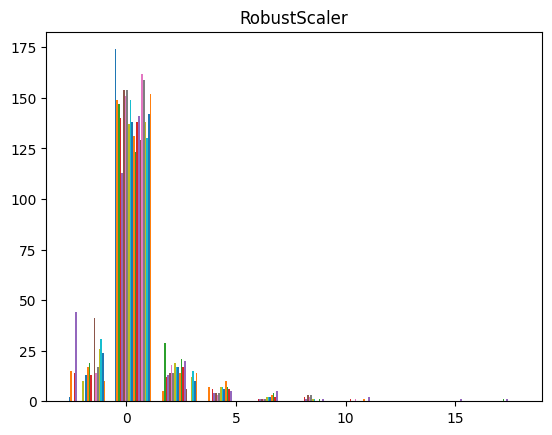

In [4]:
plt.hist(X_train_rob)
plt.title('RobustScaler')
plt.show()

## Isolation Forest for Anomaly Detection

In [5]:
#use the isolation forest model to search for anomalies on the scaled/transformed data
from sklearn.ensemble import IsolationForest

df = pd.concat([train_X, train_y], axis=1)

# create the model
clf = IsolationForest(random_state=42, contamination=0.01)
#clf = IsolationForest(random_state=42, contamination=0.02)
anomaly_threshold = -0.5

# Fit the model to the RobustScaler data
clf.fit(X_train_rob)

# create a column for the predictions of the RobustScaler data
df['anomaly_score'] = clf.decision_function(X_train_rob)
df['outlier'] = clf.predict(X_train_rob)
rob_anomaly_test = clf.decision_function(X_test_rob)
rob_anomalies_test = rob_anomaly_test < anomaly_threshold
rob_anomaly_val = clf.decision_function(X_val_rob)
rob_anomalies_val = rob_anomaly_val < anomaly_threshold
rob_train_out = df.loc[df['outlier'] == -1].index

# show the number of outliers for the RobustScaler data
print('RobustScaler')
print(df['outlier'].value_counts())
print(rob_anomalies_test)
print(rob_anomalies_val)
display(df.loc[df['outlier'] == -1])

RobustScaler
outlier
 1    174
-1      2
Name: count, dtype: int64
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,anomaly_score,outlier
73,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,1,-0.043991,-1
151,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,...,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774,1,-0.032702,-1


In [6]:
# Remove the outliers for each type of scaled/transformed data

X_train_no_outliers_rob = np.delete(X_train_rob, rob_train_out, axis=0)
y_train_no_outliers_rob = np.delete(train_y, rob_train_out)

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.295097,-1.0,-0.043991
1,1.0,0.112704,-1.0,-0.032702


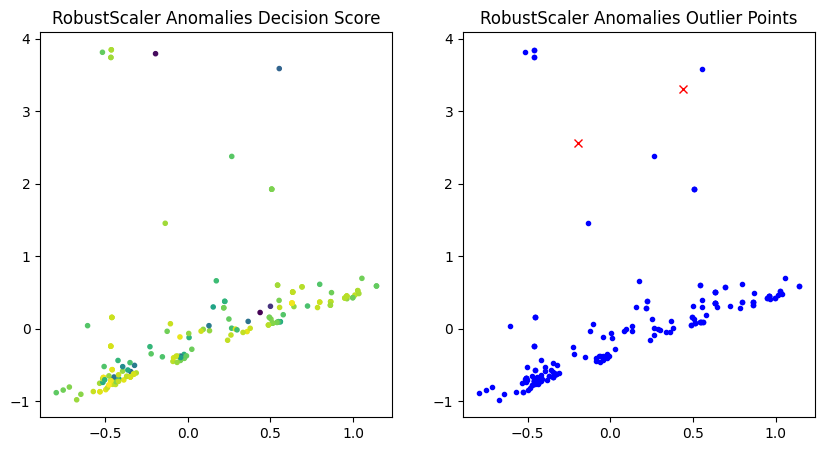

In [7]:
fig, (ax1,ax2)= plt.subplots(1, 2, figsize=(10, 5))

clf.fit(X_train_rob)
predictions_rob = clf.predict(X_train_rob)

ax1.scatter(X_train_rob[:, 0], X_train_rob[:, 1], c=clf.decision_function(X_train_rob), marker='.')
ax1.set_title('RobustScaler Anomalies Decision Score')
ax2.plot(X_train_rob[predictions_rob==1][:,0], X_train_rob[predictions_rob==1][:,1], 'b.')
ax2.plot(X_train_rob[predictions_rob==-1][:,0], X_train_rob[predictions_rob==-1][:,-1], 'rx')
ax2.set_title('RobustScaler Anomalies Outlier Points')

df = pd.DataFrame(dict(predicted_label=clf.predict(X_train_rob), score=clf.decision_function(X_train_rob)))
outliers = df[df['predicted_label'] == -1].values
inliers = df[df['predicted_label'] == 1].head(len(outliers)).values
rob_scores = pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])
display(rob_scores)

## Experimenting on the RobustScaler data with Outliers Intact

### Experimenting with PCA for Dimensionality Reduction - RobustScaler

Component 1: Explained Variance 0.7759360262650714
Component 2: Explained Variance 0.8560382879195436
Component 3: Explained Variance 0.8990950001694265
Component 4: Explained Variance 0.9234552994204346
Component 5: Explained Variance 0.9408212430634944
Component 6: Explained Variance 0.9557758117246868
Component 7: Explained Variance 0.9680908060208387
Component 8: Explained Variance 0.9764300804460644
Component 9: Explained Variance 0.9839362975124859
Component 10: Explained Variance 0.9878631168618124
Component 11: Explained Variance 0.9915549540900827
Component 12: Explained Variance 0.9945868133278641
Component 13: Explained Variance 0.9961856132309788
Component 14: Explained Variance 0.9977455635798032
Component 15: Explained Variance 0.9984088888229213
Component 16: Explained Variance 0.9990438801292485
Component 17: Explained Variance 0.999476178853867
Component 18: Explained Variance 0.9997767047290248
Component 19: Explained Variance 0.999952598008437
Component 20: Explained

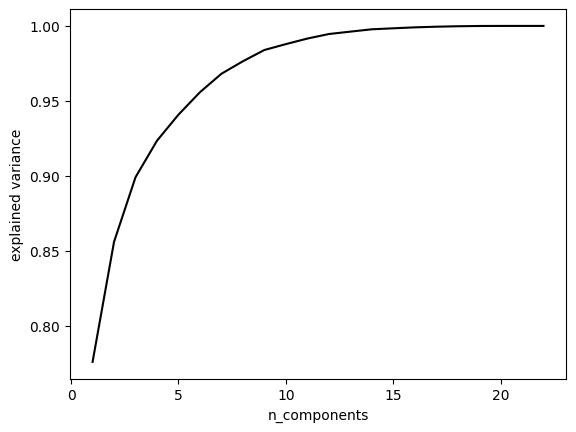

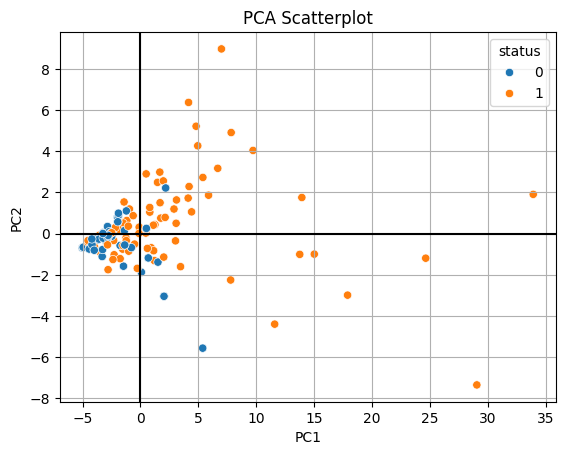

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
PC-1    -0.013077      0.021219     -0.033364        0.287299   
PC-2    -0.037862     -0.163277      0.010123       -0.231003   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
PC-1          0.221733  0.264408  0.271113    0.265177      0.247180   
PC-2         -0.170575 -0.228344 -0.128068   -0.229008      0.271488   

      MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
PC-1          0.255793  ...  0.336288     0.223912  0.434332 -0.119367   
PC-2          0.240227  ...  0.343363     0.249067 -0.490428 -0.032050   

          RPDE       DFA   spread1   spread2        D2       PPE  
PC-1  0.049746  0.003573  0.101756  0.074291  0.075631  0.107558  
PC-2  0.025565  0.100677  0.035358  0.098751  0.020408  0.044385  

[2 rows x 22 columns]


In [8]:
#use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA

#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_rob) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_rob = None
max_expvar_rob = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_rob:
        max_expvar_rob = explained_variance
        best_comp_rob = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 2)

#fit the model and transform the data
transformed_rob = pca.fit_transform(X_train_rob)

#create a dataframe of the transformed data
df_rob = pd.DataFrame(transformed_rob, columns=['PC1', 'PC2'])
df_rob['status'] = train_y

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_rob)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

#show components relations with features:
print(pd.DataFrame(pca.components_,columns=train_X.columns,index = ['PC-1','PC-2']))

### Experimenting with Hierarchical Clustering for Feature Selection - RobustScaler

#### HC on RobustScaler

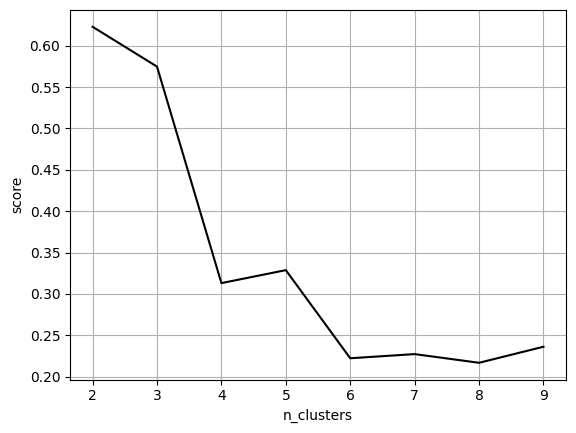

Cluster 2: Mean Silhouette Score: 0.62297625885812
Cluster 3: Mean Silhouette Score: 0.5748294074108699
Cluster 4: Mean Silhouette Score: 0.3130186647487829
Cluster 5: Mean Silhouette Score: 0.32869910066099345
Cluster 6: Mean Silhouette Score: 0.22215191265303336
Cluster 7: Mean Silhouette Score: 0.22716563626556596
Cluster 8: Mean Silhouette Score: 0.21668172798824611
Cluster 9: Mean Silhouette Score: 0.23607916666654208


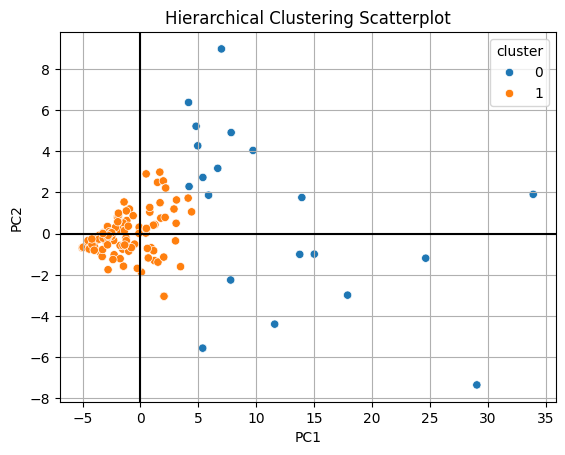

Hierarchical Clustering-Agglomerative NMI Score for RobustScaler 0.11598195169833837


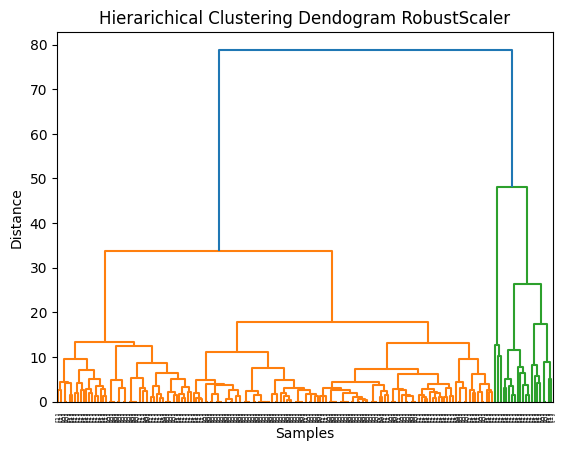

In [9]:
#create a heirarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

#find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_rob) for n in n_clusters]

#plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_rob, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

#fit the model
hi_model.fit(X_train_rob)

#create a column for the cluster
df_rob['cluster'] = hi_model.labels_

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_rob)

#make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

Z = linkage(X_train_rob, method='ward')
#Z = linkage(X_train_rob, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarichical Clustering Dendogram RobustScaler')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for RobustScaler", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df_rob['cluster']))

#### HC on RobustScaler scaled data and transformed by PCA

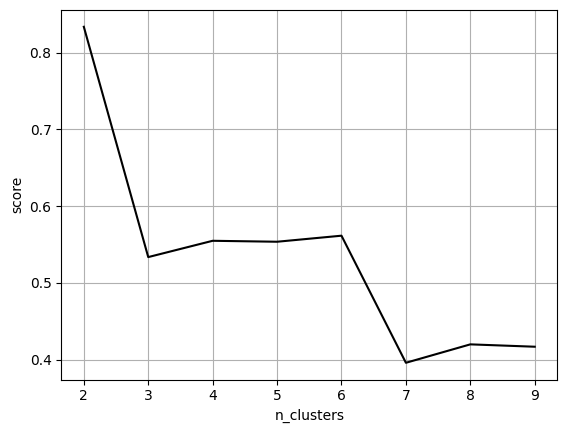

Cluster 2: Mean Silhouette Score: 0.8338623432307322
Cluster 3: Mean Silhouette Score: 0.5336953135230508
Cluster 4: Mean Silhouette Score: 0.5549407782671865
Cluster 5: Mean Silhouette Score: 0.5537026206129737
Cluster 6: Mean Silhouette Score: 0.5615819745638296
Cluster 7: Mean Silhouette Score: 0.39594475306029153
Cluster 8: Mean Silhouette Score: 0.4199534258322266
Cluster 9: Mean Silhouette Score: 0.4168713786587329


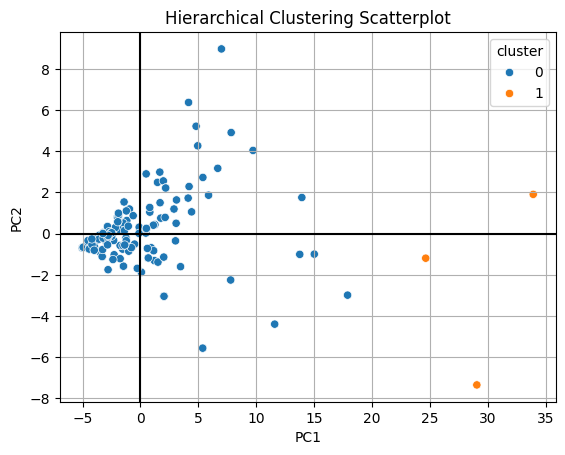

Hierarchical Clustering-Agglomerative NMI Score for RobustScaler 0.035126814588206934


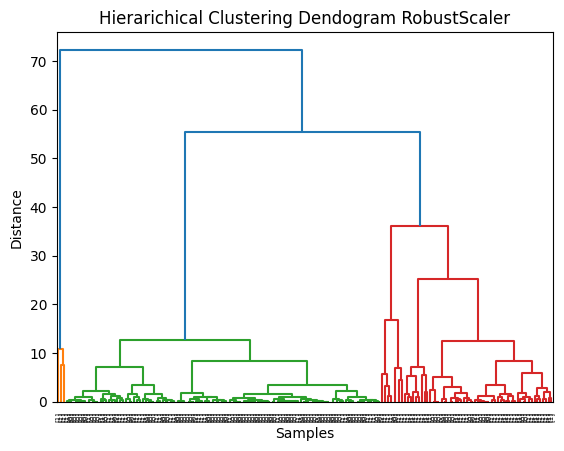

In [10]:
#create a heirarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

#find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(transformed_rob) for n in n_clusters]

#plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(transformed_rob, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

#fit the model
hi_model.fit(transformed_rob)

#create a column for the cluster
df_rob['cluster'] = hi_model.labels_

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_rob)

#make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

Z = linkage(transformed_rob, method='ward')
#Z = linkage(X_train_rob, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarichical Clustering Dendogram RobustScaler')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for RobustScaler", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df_rob['cluster']))

### Logistic Regression - RobustScaler

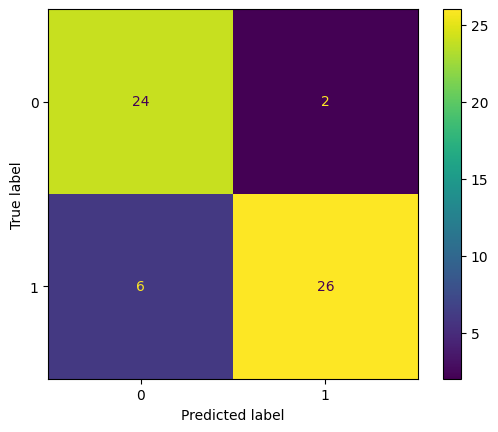

Accuracy:0.8620689655172413
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        26
           1       0.93      0.81      0.87        32

    accuracy                           0.86        58
   macro avg       0.86      0.87      0.86        58
weighted avg       0.87      0.86      0.86        58



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.get_params()

pca = PCA(n_components = best_comp_rob)
transformed_rob = pca.fit_transform(X_train_rob)

log_model.fit(transformed_rob, train_y.to_numpy().ravel())

transformed_test = pca.transform(X_test_rob)

predictions_rob = log_model.predict(transformed_test)

cm_rob = confusion_matrix(test_y, predictions_rob, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_rob, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_rob)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_rob, labels=log_model.classes_))

### Decision Tree - RobustScaler

In [12]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()
pca = PCA(n_components = best_comp_rob)
transformed_rob = pca.fit_transform(X_train_rob)

# fit the model
dt.fit(transformed_rob, train_y.to_numpy().ravel())
transformed_test = pca.transform(X_test_rob)

predict_rob_test = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predict_rob_test)
print(f'Accuracy of original model: {accuracy}')

Accuracy of original model: 0.8620689655172413


Depth:1 and Scores:0.6872549019607843
Depth:2 and Scores:0.716013071895425
Depth:3 and Scores:0.8075163398692811
Depth:4 and Scores:0.8300653594771241
Depth:5 and Scores:0.8467320261437908
Depth:6 and Scores:0.8813725490196079
Depth:7 and Scores:0.8928104575163399
Depth:8 and Scores:0.8872549019607844
Depth:9 and Scores:0.8872549019607844
Depth:10 and Scores:0.8872549019607844
Depth:11 and Scores:0.8872549019607844
Depth:12 and Scores:0.8872549019607844
Depth:13 and Scores:0.8872549019607844
Depth:14 and Scores:0.8872549019607844
Feature:1 and Scores:0.8807189542483661
Feature:2 and Scores:0.8807189542483659
Feature:3 and Scores:0.8748366013071897
Feature:4 and Scores:0.8464052287581698
Feature:5 and Scores:0.8633986928104574
Feature:6 and Scores:0.8866013071895423
Feature:7 and Scores:0.8124183006535948
Feature:8 and Scores:0.8519607843137255
Feature:9 and Scores:0.8696078431372548
Feature:10 and Scores:0.8637254901960786
Feature:11 and Scores:0.8408496732026144
Feature:12 and Scores:

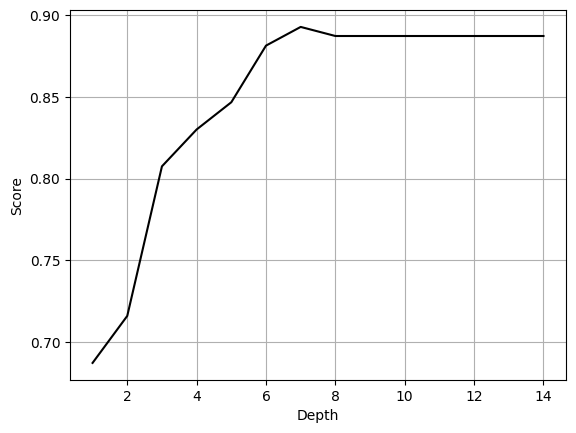

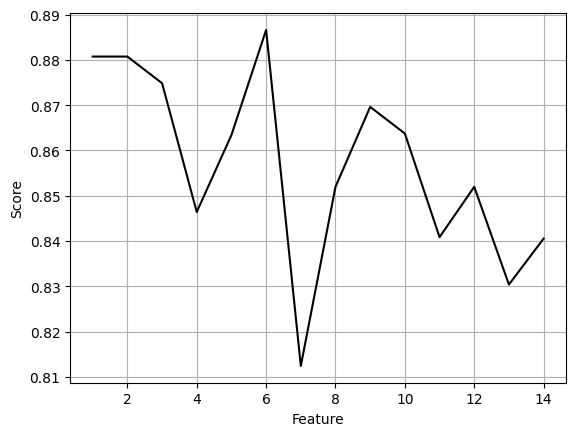

In [13]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth and best max features this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_rob, train_y, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{dscores[-1]}')

feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_rob, train_y, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()


<Figure size 8000x2000 with 0 Axes>

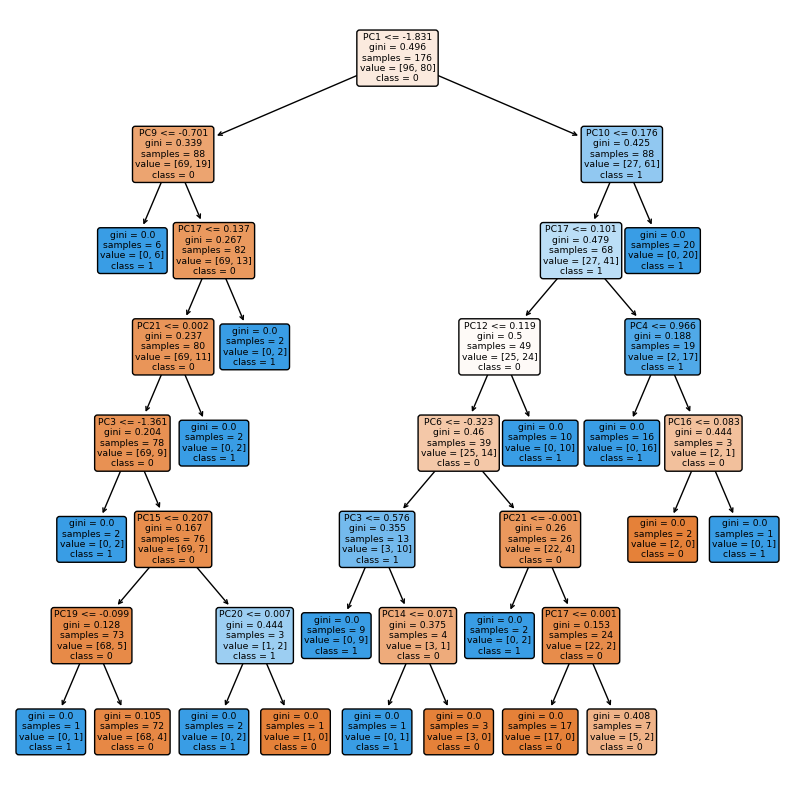

Best depth score: 7 and Best feature score: 6


In [14]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_rob = pca.fit_transform(X_train_rob)

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+ 1)

dt.fit(transformed_rob, train_y)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()
print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

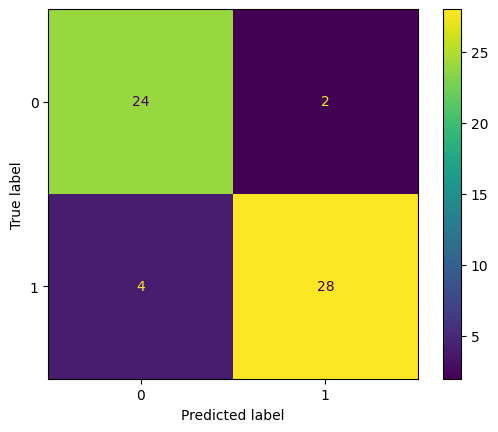

Accuracy of tuned model:0.896551724137931


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores), max_features=np.argmax(fscores))
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores))
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores))

dt.fit(transformed_rob, train_y)

predict_rob_test = dt.predict(transformed_test)

cm_rob = confusion_matrix(test_y, predict_rob_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_rob, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predict_rob_test)
print(f'Accuracy of tuned model:{accuracy}')

### Experimenting with SVM - RobustScaler

In [16]:
train_y = train_y.to_numpy().ravel()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state=42)

svc.fit(X_train_rob,train_y)

accuracies = cross_val_score(svc,X_train_rob,train_y,cv=5)
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(test_X.values,test_y))

Train Score: 0.8063492063492064
Test Score: 0.5517241379310345


In [18]:
# Creating an initial pipeline for just SVM
pipeline = Pipeline([
    ('svm', SVC())
])

# Defining the parameter grid for the grid search
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Test different kernels
    'svm__C': [0.1, 1, 10],  # Test different values for the regularization parameter C
    'svm__degree': [2, 3, 4],  # Test different polynomial degrees for the 'poly' kernel
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Test different values for the 'rbf' and 'poly' kernels
}

# Performing a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_rob, train_y)

# Getting the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Making predictions on the test data using the best model
y_pred = best_model.predict(test_X.values)

# Evaluating the best model
accuracy = accuracy_score(test_y, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')

Best Parameters: {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Accuracy with Best Model: 0.55


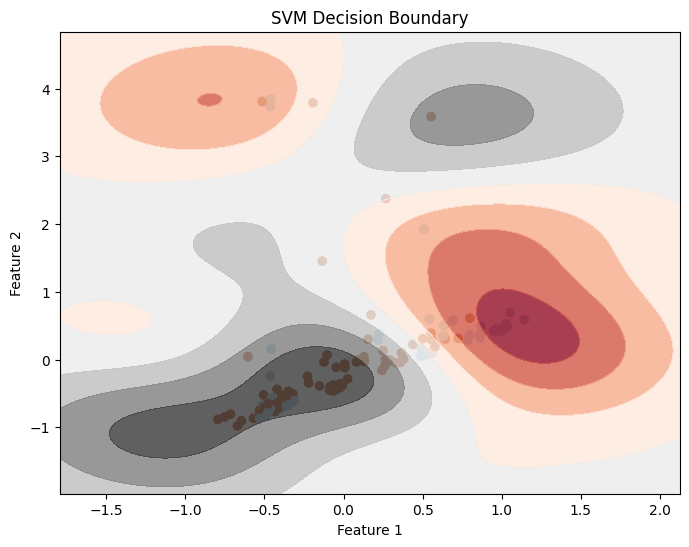

In [19]:
# Get the best model from the pipeline
best_model = pipeline.named_steps['svm']

# Plot the decision boundary
plt.figure(figsize=(8, 6))

# Scatter plot of the training points
plt.scatter(X_train_rob[:, 0], X_train_rob[:, 1], c=train_y, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()

h = .02  
x_min, x_max = X_train_rob[:, 0].min() - 1, X_train_rob[:, 0].max() + 1
y_min, y_max = X_train_rob[:, 1].min() - 1, X_train_rob[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X = X_train_rob[:, 0:2]
# Obtain decision boundary values
best_model.fit(X, train_y)
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdGy, alpha=0.8)

# Add labels and title
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

## Experimenting on RobustScaler data with Outliers Removed

### Experimenting with PCA for Dimensionality Reduction - RobustScaler Outliers Removed

Component 1: Explained Variance 0.7010209611156868
Component 2: Explained Variance 0.8045264487664272
Component 3: Explained Variance 0.864579404250348
Component 4: Explained Variance 0.8984365901734888
Component 5: Explained Variance 0.9231627830812444
Component 6: Explained Variance 0.9432219295871239
Component 7: Explained Variance 0.9596662734405956
Component 8: Explained Variance 0.9706963353563318
Component 9: Explained Variance 0.9782352923524866
Component 10: Explained Variance 0.9835525292571721
Component 11: Explained Variance 0.9883478809465052
Component 12: Explained Variance 0.992674532594999
Component 13: Explained Variance 0.994985630729437
Component 14: Explained Variance 0.9971341019809691
Component 15: Explained Variance 0.9980893602684364
Component 16: Explained Variance 0.9988567861287795
Component 17: Explained Variance 0.9993636510645107
Component 18: Explained Variance 0.9997260475340394
Component 19: Explained Variance 0.999943596543271
Component 20: Explained V

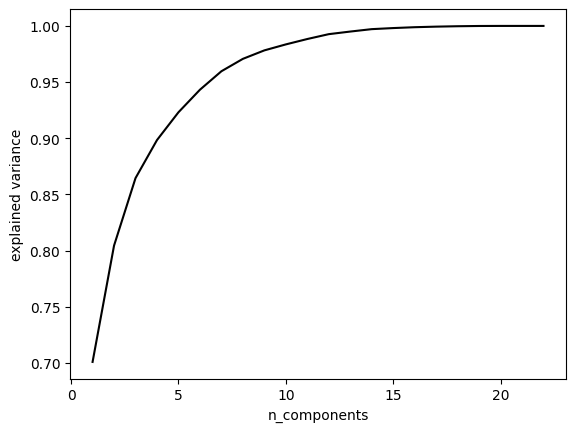

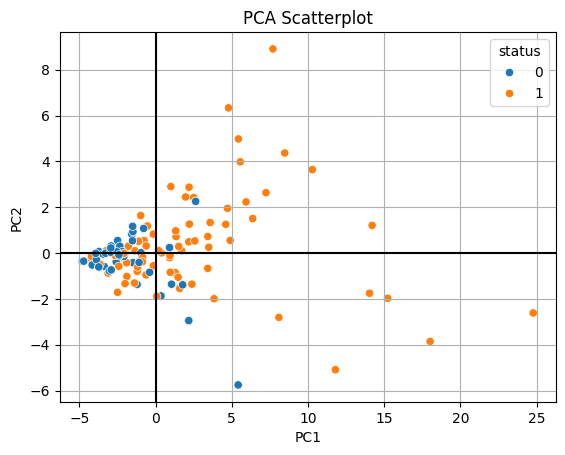

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
PC-1    -0.023331     -0.002831     -0.054465        0.280128   
PC-2    -0.026643     -0.104346      0.022991       -0.266596   
PC-3     0.340691      0.404473      0.303550       -0.073106   
PC-4    -0.037878      0.438038     -0.428932       -0.137194   
PC-5     0.101722      0.605361      0.278365        0.144864   
PC-6    -0.245287      0.425965     -0.449694        0.015703   
PC-7     0.066394     -0.144321     -0.390244        0.051767   
PC-8     0.075749     -0.144064      0.297839       -0.058162   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
PC-1          0.226363  0.252030  0.260573    0.252736      0.260085   
PC-2         -0.186570 -0.248405 -0.163713   -0.249108      0.278452   
PC-3         -0.327477  0.002453 -0.076693    0.002398      0.067862   
PC-4         -0.083708 -0.186558 -0.206989   -0.187082     -0.009009   
PC-5          0.016845  0.141512  0.290904    0.141931

In [20]:
#use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA


#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_no_outliers_rob) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_rob_no = None
max_expvar_rob_no = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_rob_no:
        max_expvar_rob_no = explained_variance
        best_comp_rob_no = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 8)

#fit the model and transform the data
transformed_rob_no = pca.fit_transform(X_train_no_outliers_rob)

#create a dataframe of the transformed data
df_rob_no = pd.DataFrame(transformed_rob_no, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8'])
df_rob_no['status'] = y_train_no_outliers_rob

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_rob_no)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()


#show components relations with features:
print(pd.DataFrame(pca.components_,columns=train_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8']))

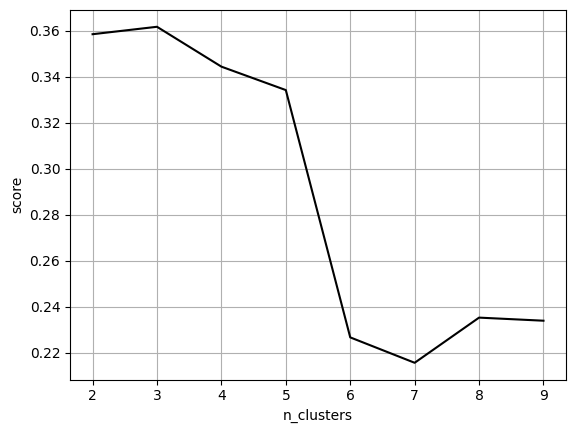

Cluster 2: Mean Silhouette Score: 0.3584364739191332
Cluster 3: Mean Silhouette Score: 0.3616629359228375
Cluster 4: Mean Silhouette Score: 0.34434217878332285
Cluster 5: Mean Silhouette Score: 0.3341657350812029
Cluster 6: Mean Silhouette Score: 0.2267264925384661
Cluster 7: Mean Silhouette Score: 0.2156908996504103
Cluster 8: Mean Silhouette Score: 0.2353112973754964
Cluster 9: Mean Silhouette Score: 0.2339680659481056


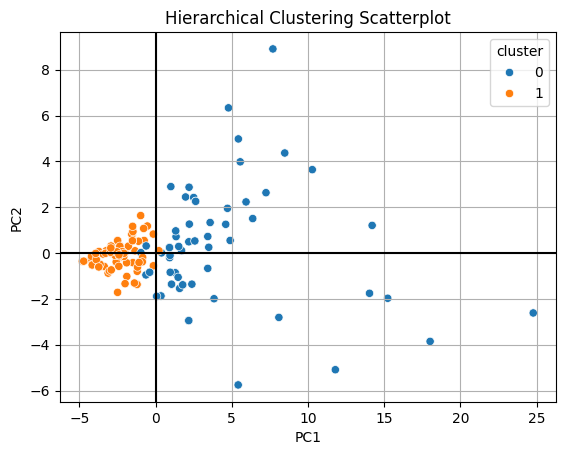

Hierarchical Clustering-Agglomerative NMI Score for RobustScaler No Outliers 0.1080908454893264


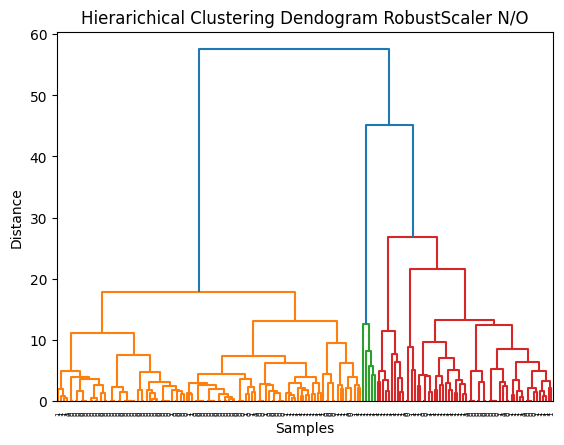

In [21]:
#create a heirarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_no_outliers_rob) for n in n_clusters]

#plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_no_outliers_rob, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

#fit the model
hi_model.fit(X_train_no_outliers_rob)


#create a column for the cluster
df_rob_no['cluster'] = hi_model.labels_

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_rob_no)

#make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()


Z = linkage(X_train_no_outliers_rob, method='ward')
#Z = linkage(X_train_no_outliers_rob, method='average')
dendrogram(Z, labels=y_train_no_outliers_rob)
plt.title('Hierarichical Clustering Dendogram RobustScaler N/O')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for RobustScaler No Outliers", 
      normalized_mutual_info_score(y_train_no_outliers_rob, df_rob_no['cluster']))

### Experimenting with Logistic Regression - RobustScaler Outliers Removed

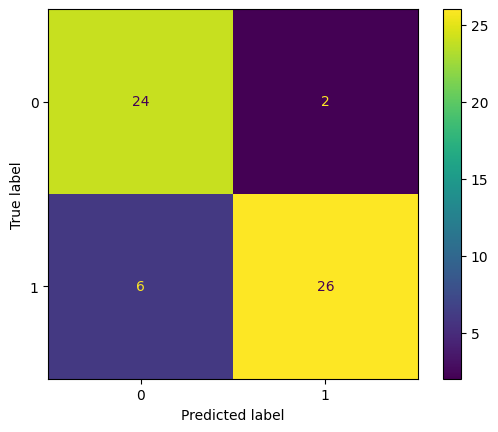

Accuracy:0.8620689655172413
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        26
           1       0.93      0.81      0.87        32

    accuracy                           0.86        58
   macro avg       0.86      0.87      0.86        58
weighted avg       0.87      0.86      0.86        58



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.get_params()

pca = PCA(n_components = best_comp_rob)
transformed_rob = pca.fit_transform(X_train_no_outliers_rob)

log_model.fit(transformed_rob, y_train_no_outliers_rob.ravel())
transformed_test = pca.transform(X_test_rob)

predictions_rob_no = log_model.predict(transformed_test)

cm_rob = confusion_matrix(test_y, predictions_rob_no, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_rob, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_rob_no)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_rob_no, labels=log_model.classes_))

### Experimenting with Decision Tree - RobustScaler Outliers Removed

In [23]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()
pca = PCA(n_components = best_comp_rob_no)

transformed_rob_no = pca.fit_transform(X_train_no_outliers_rob)

# fit the model
dt.fit(transformed_rob_no, y_train_no_outliers_rob)
transformed_test = pca.transform(X_test_rob)

predictions_rob_no = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predictions_rob_no)
accuracy

0.9482758620689655

Depth:1 and Scores:0.2339680659481056
Depth:2 and Scores:0.2339680659481056
Depth:3 and Scores:0.2339680659481056
Depth:4 and Scores:0.2339680659481056
Depth:5 and Scores:0.2339680659481056
Depth:6 and Scores:0.2339680659481056
Depth:7 and Scores:0.2339680659481056
Depth:8 and Scores:0.2339680659481056
Depth:9 and Scores:0.2339680659481056
Depth:10 and Scores:0.2339680659481056
Depth:11 and Scores:0.2339680659481056
Depth:12 and Scores:0.2339680659481056
Depth:13 and Scores:0.2339680659481056
Depth:14 and Scores:0.2339680659481056
Feature:1 and Scores:0.8437908496732025
Feature:2 and Scores:0.8741830065359476
Feature:3 and Scores:0.9140522875816993
Feature:4 and Scores:0.9075163398692812
Feature:5 and Scores:0.9022875816993464
Feature:6 and Scores:0.9120915032679738
Feature:7 and Scores:0.8552287581699346
Feature:8 and Scores:0.8794117647058822
Feature:9 and Scores:0.8620915032679738
Feature:10 and Scores:0.8604575163398694
Feature:11 and Scores:0.8663398692810457
Feature:12 and Scores

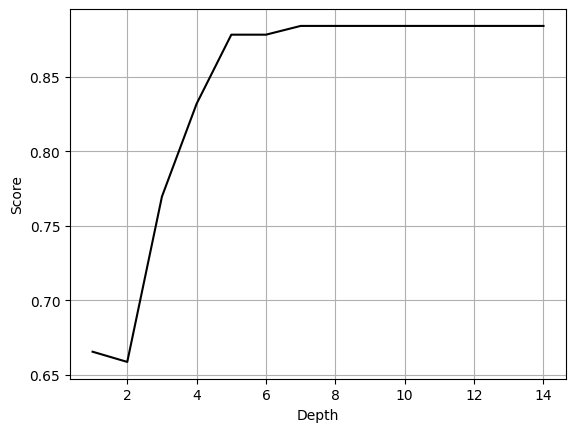

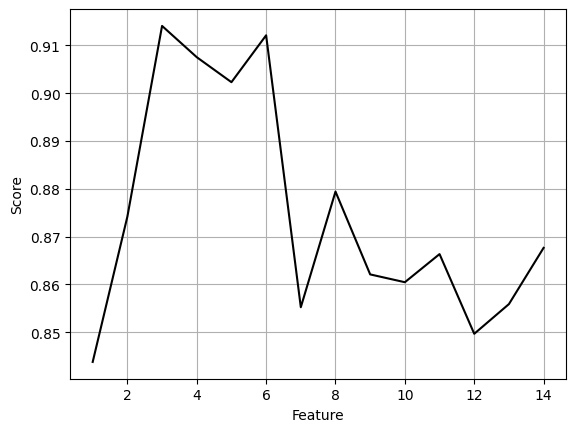

In [24]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_rob_no, y_train_no_outliers_rob, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{scores[-1]}')
    
feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_rob_no, y_train_no_outliers_rob, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()

<Figure size 8000x2000 with 0 Axes>

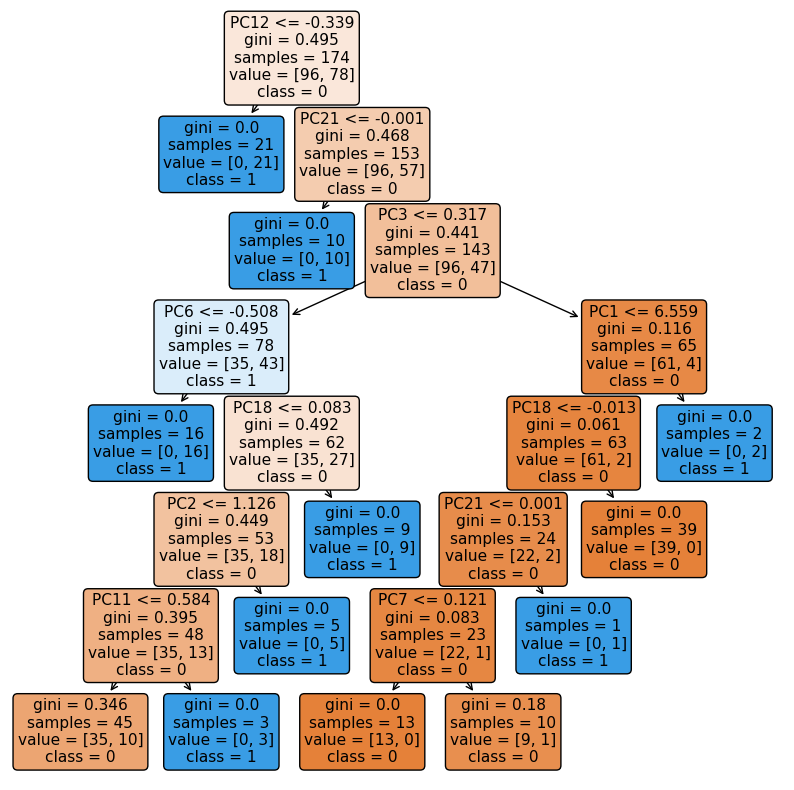

Best depth score: 7 and Best feature score: 3


In [25]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_rob_no = pca.fit_transform(X_train_no_outliers_rob)

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores)+1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_rob_no, y_train_no_outliers_rob)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()

print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

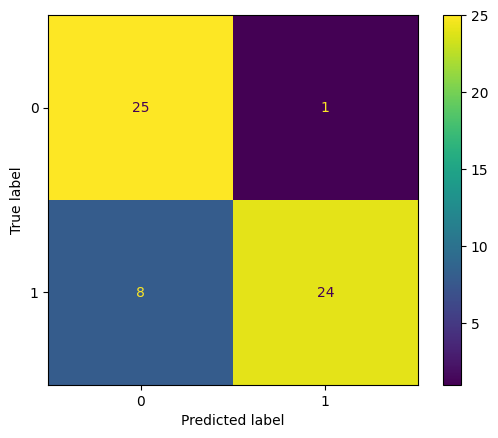

Accuracy of tuned model:0.8448275862068966


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores)+1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_rob_no, y_train_no_outliers_rob)

predictions_rob_no = dt.predict(transformed_test)

cm_rob_no = confusion_matrix(test_y, predictions_rob_no, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_rob_no, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_rob_no)
print(f'Accuracy of tuned model:{accuracy}')

## Experimenting with SVM - RobustScaler Outliers Removed

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [28]:
y_train_no_outliers_rob = y_train_no_outliers_rob.ravel()

In [29]:
svc = SVC(random_state=42)

svc.fit(X_train_no_outliers_rob,y_train_no_outliers_rob)

accuracies = cross_val_score(svc,X_train_no_outliers_rob,y_train_no_outliers_rob,cv=5)
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(test_X.values,test_y))

Train Score: 0.8218487394957984
Test Score: 0.5517241379310345


In [30]:
# Creating an initial pipeline for just SVM
pipeline = Pipeline([
    ('svm', SVC(random_state=42))
])

# Defining the parameter grid for the grid search
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Test different kernels
    'svm__C': [0.1, 1, 10],  # Test different values for the regularization parameter C
    'svm__degree': [2, 3, 4],  # Test different polynomial degrees for the 'poly' kernel
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Test different values for the 'rbf' and 'poly' kernels
}

# Performing a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_no_outliers_rob, y_train_no_outliers_rob)

# Getting the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Making predictions on the test data using the best model
y_pred = best_model.predict(test_X.values)

# Evaluating the best model
accuracy = accuracy_score(test_y, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')

Best Parameters: {'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Accuracy with Best Model: 0.55


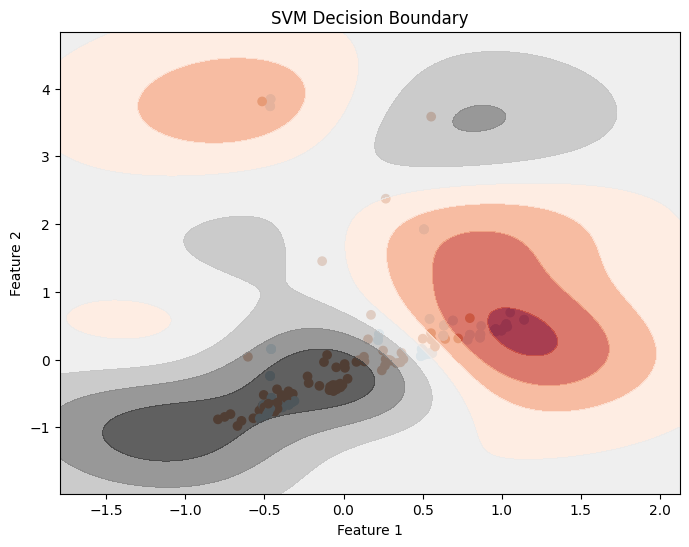

In [31]:
# Get the best model from the pipeline
best_model = pipeline.named_steps['svm']

# Plot the decision boundary
plt.figure(figsize=(8, 6))

# Scatter plot of the training points
plt.scatter(X_train_no_outliers_rob[:, 0], X_train_no_outliers_rob[:, 1], c=y_train_no_outliers_rob, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()

h = .02  
x_min, x_max = X_train_no_outliers_rob[:, 0].min() - 1, X_train_no_outliers_rob[:, 0].max() + 1
y_min, y_max = X_train_no_outliers_rob[:, 1].min() - 1, X_train_no_outliers_rob[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X = X_train_no_outliers_rob[:, 0:2]
# Obtain decision boundary values
best_model.fit(X, y_train_no_outliers_rob)
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdGy, alpha=0.8)

# Add labels and title
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()